# NLO: Non-Linear Oscillator

http://web.physics.ucsb.edu/~fratus/phys103/LN/NLO.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

General NLO:
$$ \ddot{x}+2 \beta \dot{x}+\omega^{2} x+\phi x^{2}+\epsilon x^{3}=f(t) $$

Duffing equation: $$ \ddot{x} + \omega^2 x + \epsilon x^3 = 0$$ where $\omega = \sqrt{\frac{k}{m}}$ where $k$ is a constant and $m$ is a mass, and $\epsilon = \frac{\lambda}{6m}, \lambda > 0$

In [2]:
from denn.nlo.nlo_utils import NLO_PARAMS, nlo_eqn, numerical_solution

In [3]:
NLO_PARAMS

{'omega': 1,
 'epsilon': 0.1,
 'beta': 0.1,
 'phi': 1,
 'F': 0.1,
 'forcing': <function denn.nlo.nlo_utils.<lambda>(t)>,
 'x0': 0,
 'dx0': 0.5}

In [4]:
n = 100
periods = 4
t = np.linspace(0, periods * np.pi, n)

In [6]:
x = numerical_solution(t)

Numerical solution succes: True


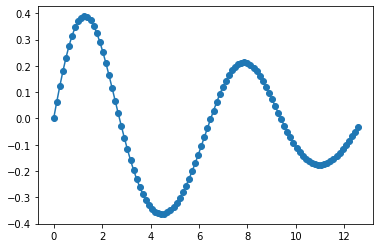

In [8]:
plt.plot(t, x, '-o');

In [235]:
from denn.utils import Generator